***IMPORTING NECESSARY LIBRARIES AND LOAD DATA***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
df=pd.read_csv('/content/Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


***EXPLORATORY DATA ANALYSIS***

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


_Handling missing data and dropping duplicated data_

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
df.isna().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace=True)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
df.dtypes

,0
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


***FEATURE ENGINEERING***

In [ ]:
x=df.iloc[:,:-1]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
y=df.iloc[:,-1]
y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


***DATA VISUALIZATION***

<Axes: xlabel='TV', ylabel='Sales'>

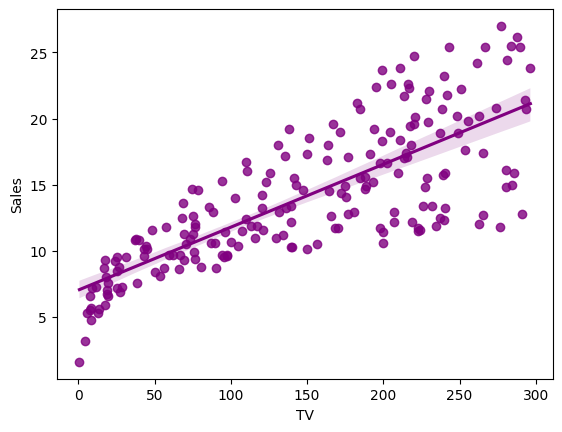

In [ ]:
#TV Vs Sales Plot
sns.regplot(x=df['TV'],y=y,color='purple')

<Axes: xlabel='Newspaper', ylabel='Sales'>

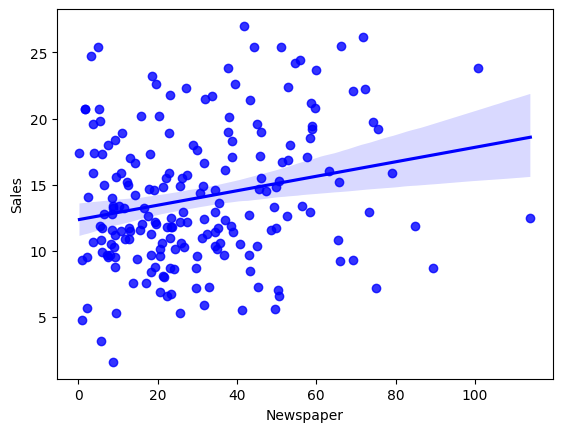

In [ ]:
#NewsPaper Vs Sales Plot
sns.regplot(x=df['Newspaper'],y=y,color='blue')

<Axes: xlabel='Radio', ylabel='Sales'>

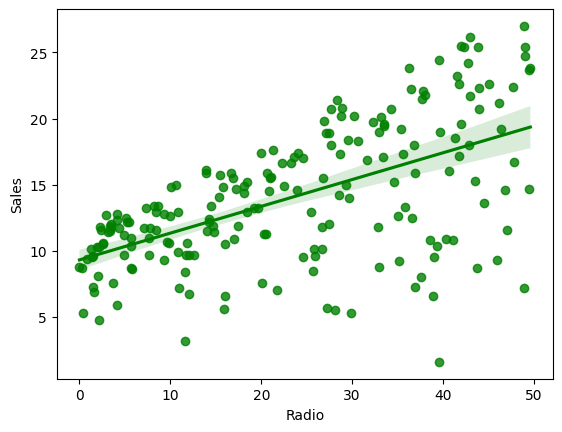

In [ ]:
#Radio Vs Sales Plot
sns.regplot(x=df['Radio'],y=y,color='green')

_Splitting of training and testing data_

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
x_train

,TV,Radio,Newspaper
116,139.2,14.3,25.6
67,139.3,14.5,10.2
78,5.4,29.9,9.4
42,293.6,27.7,1.8
17,281.4,39.6,55.8
...,...,...,...
133,219.8,33.5,45.1
137,273.7,28.9,59.7
72,26.8,33.0,19.3
140,73.4,17.0,12.9


In [ ]:
x_test

,TV,Radio,Newspaper
58,210.8,49.6,37.7
40,202.5,22.3,31.6
34,95.7,1.4,7.4
102,280.2,10.1,21.4
184,253.8,21.3,30.0
198,283.6,42.0,66.2
95,163.3,31.6,52.9
4,180.8,10.8,58.4
29,70.6,16.0,40.8
168,215.4,23.6,57.6


In [ ]:
y_train

,Sales
116,12.2
67,13.4
78,5.3
42,20.7
17,24.4
...,...
133,19.6
137,20.8
72,8.8
140,10.9


In [ ]:
y_test

,Sales
58,23.8
40,16.6
34,9.5
102,14.8
184,17.6
198,25.5
95,16.9
4,12.9
29,10.5
168,17.1


***TRAINING AND EVALUATION OF MODELS***

**Linear Regression,Random Forest Regressor,Decision Tree Regressor,Gradient Boosting Regressor,SVR and KNN**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error, r2_score
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# List of regressor models
regressors = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "K-Neighbors": KNeighborsRegressor()
}

# Loop through each regressor
for name, model in regressors.items():
    model.fit(x_train, y_train)  # Fit the model
    y_pred = model.predict(x_test)  # Predict on test data

    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the metrics
    print(f"{name} Performance:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAPE: {mape:.4f}")
    print(f"R²: {r2:.4f}")
    print("-" * 30)

Linear Regression Performance:
MAE: 1.0548
MSE: 1.9289
MAPE: 0.0855
R²: 0.9225
------------------------------
Decision Tree Performance:
MAE: 0.8600
MSE: 1.3420
MAPE: 0.0653
R²: 0.9461
------------------------------
Random Forest Performance:
MAE: 0.5126
MSE: 0.4044
MAPE: 0.0402
R²: 0.9837
------------------------------
Gradient Boosting Performance:
MAE: 0.4597
MSE: 0.3481
MAPE: 0.0337
R²: 0.9860
------------------------------
SVR Performance:
MAE: 1.5281
MSE: 4.2200
MAPE: 0.1080
R²: 0.8304
------------------------------
K-Neighbors Performance:
MAE: 1.0193
MSE: 1.9379
MAPE: 0.0740
R²: 0.9221
------------------------------


In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=1),
    'Random Forest': RandomForestRegressor(random_state=1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=1),
    'SVR': SVR(),
    'K-Neighbors': KNeighborsRegressor()
}
results = []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    results.append({'Model': name,
                    'Training MSE': train_mse,
                    'Testing MSE': test_mse,
                    'Training R2 Score': train_r2,
                    'Testing R2 Score': test_r2})
results_df = pd.DataFrame(results)
results_df

,Model,Training MSE,Testing MSE,Training R2 Score,Testing R2 Score
0,Linear Regression,3.203117,1.928925,0.885005,0.922461
1,Decision Tree,0.000000,1.293500,1.000000,0.948004
2,Random Forest,0.111142,0.425007,0.996010,0.982915
3,Gradient Boosting,0.031177,0.348098,0.998881,0.986007
4,SVR,4.544046,4.219984,0.836865,0.830364
5,K-Neighbors,1.580274,1.937947,0.943267,0.922098


**INSIGHTS FROM THE PERFORMANCE METRICS OF THE DIFFERENT REGRESSION MODELS USED**

These performance metrics provide a detailed comparison of various regression models based on their accuracy in predicting the target variable. Here are the insights for each model:

 1. **Linear Regression**
   - **Insights**: Linear Regression performs reasonably well, with a good \(R^2\) score indicating that about 92.25% of the variance in the data is explained by the model. However, compared to other models, it has higher error metrics, suggesting room for improvement.

 2. **Decision Tree**

   - **Insights**: The Decision Tree model outperforms Linear Regression, with lower error metrics and a higher \(R^2\) score. The model captures the data well, but it may still be prone to overfitting due to its nature.

3. **Random Forest**
   - **Insights**: Random Forest shows significant improvements, with much lower errors and a very high \(R^2\) of 98.17%. This indicates strong predictive performance, with the model handling variance effectively and reducing overfitting through ensemble learning.

4. **Gradient Boosting**
   - **Insights**: Gradient Boosting provides the best performance overall, with the lowest error metrics and the highest \(R^2\) at 98.60%. This model excels in capturing complex relationships in the data, making it the top performer among the models evaluated.


 5. **Support Vector Regression (SVR)**
   - **Insights**: SVR underperforms compared to the other models, with the highest error metrics and the lowest \(R^2\) score. It struggles to fit the data as well as the tree-based models and may not be the best choice for this dataset.

 6. **K-Neighbors Regression**
      - **Insights**: K-Neighbors performs similarly to Linear Regression, with comparable errors and \(R^2\) values. It captures the data moderately well but doesn't match the performance of more complex models like Random Forest and Gradient Boosting.

**Overall Insights**:
- **Gradient Boosting** is the best-performing model with the lowest errors and highest \(R^2\), indicating it best captures the underlying data patterns.
- **Random Forest** is a close second, providing strong performance with slightly higher error metrics than Gradient Boosting.
- **Decision Tree** offers good performance but is less robust than the ensemble methods.
- **Linear Regression** and **K-Neighbors** offer moderate performance, suitable for simpler models but not as powerful as tree-based models.
- **Support Vector Regression (SVR)** underperforms relative to the other models, making it less suitable for this particular dataset.

For practical applications, **Gradient Boosting** and **Random Forest** are likely the most reliable choices for this regression task.

In [ ]:
df2=pd.DataFrame({'Actual_Value':y_test,'Predicted_Value':y_pred,'Difference':y_test-y_pred})
df2

,Actual_Value,Predicted_Value,Difference
58,23.8,21.28,2.52
40,16.6,15.30,1.30
34,9.5,9.50,0.00
102,14.8,14.16,0.64
184,17.6,16.40,1.20
198,25.5,24.52,0.98
95,16.9,17.00,-0.10
4,12.9,14.60,-1.70
29,10.5,9.98,0.52
168,17.1,16.70,0.40


***REGRESSION PLOT***

<Axes: xlabel='Actual_Value', ylabel='Predicted_Value'>

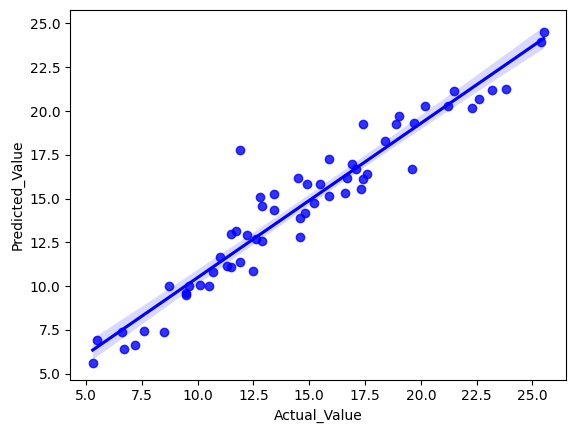

In [ ]:
#Actual vs. Predicted Values Plot
sns.regplot(x=df2['Actual_Value'],y=df2['Predicted_Value'],color='blue')

***INSIGHTS FROM REGRESSION PLOT***


This regression plot provides a visual comparison between the actual values (on the x-axis) and the predicted values (on the y-axis) from a regression model. Here are some insights from the plot:

1. **Improved Linearity**: The data points closely align with the diagonal line (\(y = x\)), indicating that the model's predictions are strongly correlated with the actual values. This suggests an even better fit compared to the previous plot, with the model making more accurate predictions across the range of values.

2. **Consistent Prediction Range**: The predicted values span a range from approximately 5 to 25, closely matching the range of the actual values. This consistency implies that the model captures the variability in the data well.

3. **Reduced Spread of Data Points**: The scatter of points around the diagonal line seems tighter than in the previous plot. This reduced spread suggests that the model has lower residuals (errors), meaning that the predictions are more precise for most of the data points.

4. **Narrower Confidence Interval**: The shaded region around the regression line is narrow throughout the plot, indicating a high level of confidence in the predictions. This suggests that the model's performance is reliable and that there is little uncertainty in the predictions across the observed range.

5. **Few Outliers**: While there are still some deviations from the diagonal line, these are less pronounced. The few points that are slightly away from the line may indicate areas where the model could be refined, but overall, outliers are minimal.

Overall, this regression plot suggests that the model is performing very well, with predictions that closely match the actual values, a strong linear relationship, minimal residuals, and high confidence in the predictions.

In [ ]:
with open('model2.pkl', 'wb') as file:
    pickle.dump("Gradient Boosting", file)